<h1>Trabalho Prático 1 - Processamento Digital de Imagens</h1>
<p> Transformação de imagem, equalização e apresentação em histogramas. </p>

<h2>Importa-se as bibliotecas a serem utilizadas</h2>

In [1]:
from matplotlib import pyplot as plt
from skimage import io 
import math

<h2>Leitura da imagem</h2>

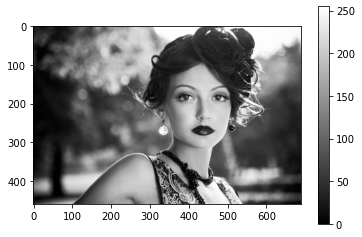

In [20]:
img = io.imread('imagem.jpg')
plt.imshow(img, cmap='gray')
plt.colorbar()

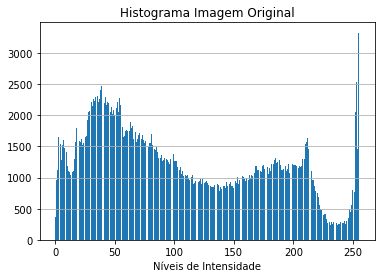

In [5]:
gerar_histograma(img, 'Histograma Imagem Original')

<h2>Transformação de intensidade Logarítmica</h2>
    <p>Expande os valores dos pixels mais escuros</p>

Digite o fator a ser calculado: 0.5


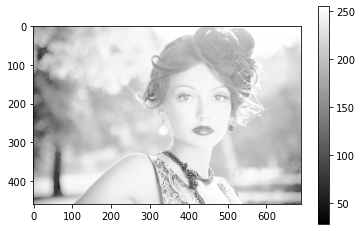

In [6]:
#Transformação de intensidade Logarítmica
#expande os valores dos pixels mais escuros
img = io.imread('imagem.jpg')
row, col, color = img.shape
fator = float(input('Digite o fator a ser calculado: '))
for i in range(row):
    for j in range(col):
        img[i,j,0] = (255/math.log(1+255/fator))*math.log((1+img[i,j,0])/fator)
        img[i,j,1] = (255/math.log(1+255/fator))*math.log((1+img[i,j,1])/fator)
        img[i,j,2] = (255/math.log(1+255/fator))*math.log((1+img[i,j,2])/fator)
imgLog = img
plt.imshow(imgLog, cmap='gray')
plt.colorbar()
#Testar imagem com fator 60 para mostrar degradação.

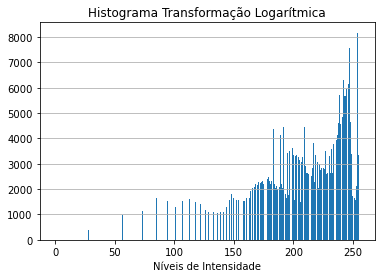

In [7]:
gerar_histograma(imgLog, 'Histograma Transformação Logarítmica')

<h2>Transformação de intensidade Exponencial</h2>
    <p>Aumenta-se o contraste das regiões claras.</p>

Digite o fator a ser calculado: 30


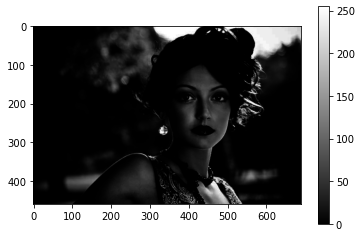

In [8]:
#Transformação de intensidade Exponencial
#aumenta o contraste das regiões claras
img = io.imread('imagem.jpg')
row, col, color = img.shape
fator = float(input('Digite o fator a ser calculado: '))
aux = 255/fator
for i in range(row):
    for j in range(col):
        auxR = img[i,j,0]/fator
        auxG = img[i,j,1]/fator
        auxB = img[i,j,2]/fator
        img[i,j,0] = (255/(math.exp(aux)-1))*(math.exp(auxR)-1)
        img[i,j,1] = (255/(math.exp(aux)-1))*(math.exp(auxG)-1)
        img[i,j,2] = (255/(math.exp(aux)-1))*(math.exp(auxB)-1)
imgExpo = img
plt.imshow(imgExpo, cmap='gray')
plt.colorbar()

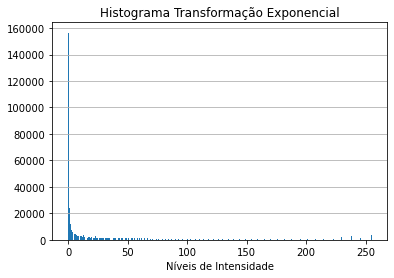

In [9]:
gerar_histograma(imgExpo, 'Histograma Transformação Exponencial')

<h2>Transformação de intensidade Inversa</h2>

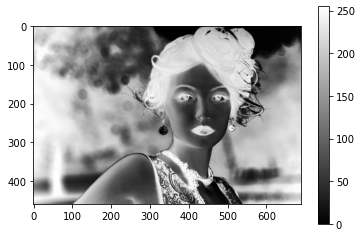

In [10]:
#Transformação de intensidade inversa
img = io.imread('imagem.jpg')
row, col, color = img.shape
for i in range(row):
    for j in range(col):
        img[i,j] = 255 - img[i,j]
imgInv = img
plt.imshow(imgInv, cmap='gray')
plt.colorbar()

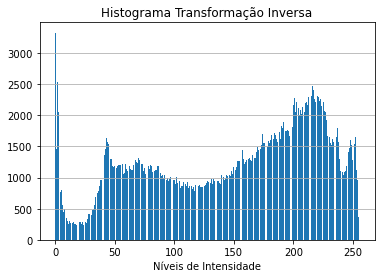

In [11]:
gerar_histograma(imgInv,'Histograma Transformação Inversa')

<h2>Geração do Histograma</h2>

In [12]:
def gerar_histograma(img, title):
    row, col, color = img.shape
    histograma = {}
    for i in range(256): # Inicializando o dicionário 
        histograma[i] = 0

    for i in range(row):
        for j in range(col):
            histograma[img[i, j, 1]] = histograma[img[i, j, 1]] + 1
    #Plotando Histograma:
    plt.bar(histograma.keys(),histograma.values())
    plt.title(title, fontdict=None, loc='center', pad=None)
    plt.xlabel("Níveis de Intensidade")
    plt.grid(axis='y')
    plt.show()

<h2>Equalização do histograma</h2>

In [13]:
#Cálculo probabilístico para mostrar quantas vezes o valor apareceu de acordo com o número total de pixels na imagem.
def equalize(img):
    n_pixels = img.shape[0] * img.shape[1]
    row, col, color = img.shape
    histo = {}
    for i in range(0, 256):
        histo[i] = 0
        
    #Criando histograma:
    for i in range(row):
        for j in range(col):
            histo[img[i, j, 1]] = histo[img[i, j, 1]] + 1
            
    #Criando Histograma probabilístico:
    histo_prob = {}
    for i in range(0,256):
        histo_prob[i] = histo[i]/n_pixels
    plt.bar(histo_prob.keys(), histo_prob.values())
    plt.title('Histograma Imagem Normal', fontdict=None, loc='center', pad=None)
    plt.grid(axis='y')
    plt.show()
    
    #Criando Histograma de probabilidade acumulada: 
    acc_prob = {}
    sum_prob = 0
    for i in range(0, 256):
        if i == 0:
            pass
        else: 
            sum_prob += histo_prob[i-1]
        acc_prob[i] = 255*(histo_prob[i] + sum_prob)
        
    plt.bar(acc_prob.keys(), acc_prob.values())
    plt.title('Histograma da Probabilidade Acumulada', fontdict=None, loc='center', pad=None)
    plt.grid(axis='y')
    plt.show()
    
    #Equalizando:
    plt.imshow(img)
    plt.title('Imagem Normal', fontdict=None, loc='center', pad=None)
    plt.show()
    for i in range(row):
        for j in range(col):
            img[i, j, 0] = acc_prob[img[i, j, 0]]
            img[i, j, 1] = acc_prob[img[i, j, 1]]
            img[i, j, 2] = acc_prob[img[i, j, 2]]
    plt.imshow(img)
    plt.title('Imagem Equalizada', fontdict=None, loc='center', pad=None)
    plt.show()
    gerar_histograma(img, 'Histograma Imagem Equalizada')

<h2>Equalizando imagem esbranquiçada após transformação logarítmica.</h2>

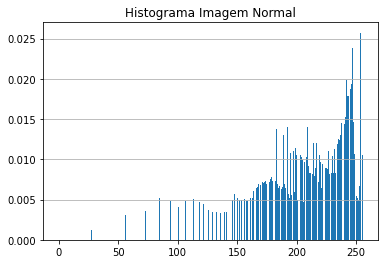

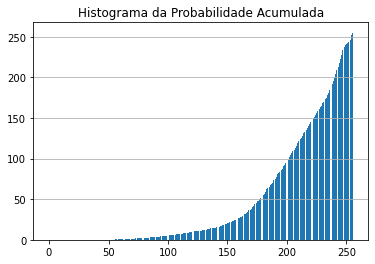

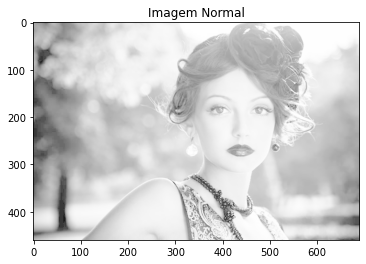

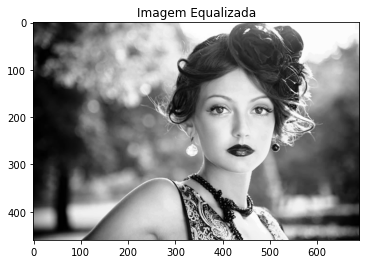

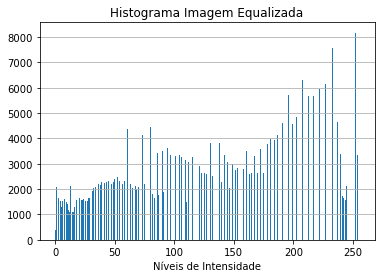

In [14]:
equalize(imgLog)

<h2>Especificando</h2>

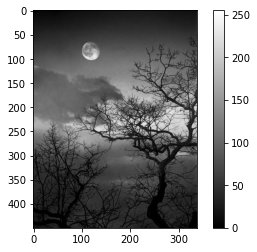

In [15]:
img2 = io.imread('imagem2.jpg')
plt.imshow(img2, cmap='gray')
plt.colorbar()

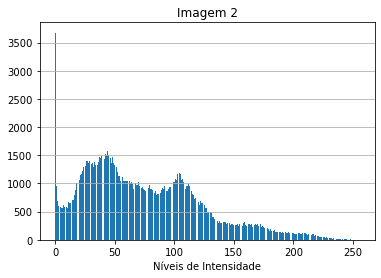

In [16]:
gerar_histograma(img2, 'Imagem 2')

In [18]:
def especificar(img, img2):
    n_pixelsImg2 = img2.shape[0] * img2.shape[1]
    row, col, color = img.shape
    row2, col2, color2 = img2.shape
    histo = {}
    for i in range(0, 256):
        histo[i] = 0
        
    #Criando histograma:
    for i in range(row2):
        for j in range(col2):
            histo[img2[i, j, 1]] = histo[img2[i, j, 1]] + 1
            
    #Criando Histograma probabilístico:
    histo_prob = {}
    for i in range(0,256):
        histo_prob[i] = histo[i]/n_pixelsImg2
    #plt.bar(histo_prob.keys(), histo_prob.values())
    #plt.title('Histograma Imagem Normal', fontdict=None, loc='center', pad=None)
    #plt.grid(axis='y')
    #plt.show()
    
    #Criando Histograma de probabilidade acumulada: 
    acc_prob = {}
    sum_prob = 0
    for i in range(0, 256):
        if i == 0:
            pass
        else: 
            sum_prob += histo_prob[i-1]
        acc_prob[i] = 255*(histo_prob[i] + sum_prob)
        
    #plt.bar(acc_prob.keys(), acc_prob.values())
    #plt.title('Histograma da Probabilidade Acumulada', fontdict=None, loc='center', pad=None)
    #plt.grid(axis='y')
    #plt.show()
    
    #Equalizando:
    plt.imshow(img)
    plt.title('Imagem Normal', fontdict=None, loc='center', pad=None)
    plt.show()
    for i in range(row):
        for j in range(col):
            img[i, j, 0] = acc_prob[img[i, j, 0]]
            img[i, j, 1] = acc_prob[img[i, j, 1]]
            img[i, j, 2] = acc_prob[img[i, j, 2]]
    plt.imshow(img)
    plt.title('Imagem Especificada c/ Histograma da Imagem 2', fontdict=None, loc='center', pad=None)
    plt.show()
    gerar_histograma(img, 'Histograma Imagem Especificada')

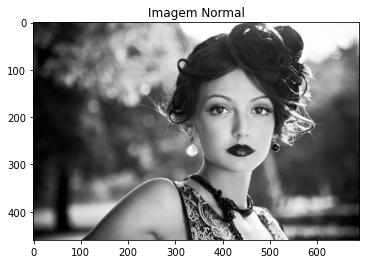

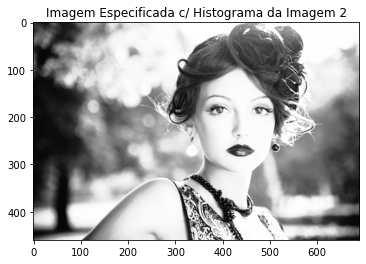

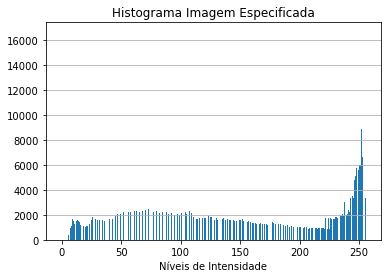

In [21]:
especificar(img, img2)